# Movie Recommendation System

### Machine Leaning Pipeline for Movie Recommendation System:
1. Data Extraction and Cleaning
2. Build ML model
3. Build Software Infrastucture.

#### Recommendation Systems is nothing but matching the users with the movies they might like.

### Implementing a recommendation system. 
There are three methods of recommending

1. Popular movies: (keeping a track of most trending video)
    Movies which have been viewed maximum over the week by different users.
2. Content based recomendation system: 
    Recommend the user movies whose contents is similar to the contents viewed by the user recently (1 week). Contents include genre, director, cast.

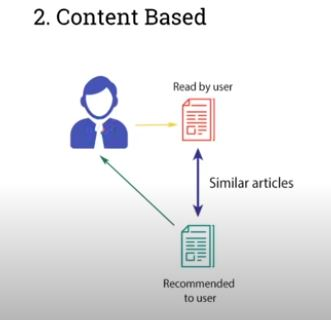


3. Collaborative filtering used by Netflix: (peer to peer suggestion)

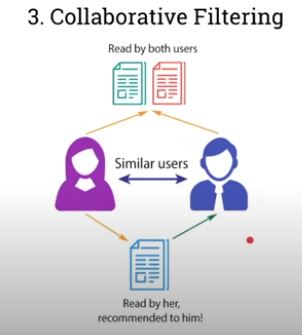


In [1]:
import pandas as pd
import numpy as np
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
# Compute cosine similarity between samples in X and Y.
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]

In [3]:
def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]

In [4]:
df = pd.read_csv('movie_dataset.csv')

In [5]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
index                   4803 non-null int64
budget                  4803 non-null int64
genres                  4775 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4391 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null fl

In [7]:
df['popularity'].describe()

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64

In [8]:
df['vote_average'].describe()

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

In [9]:
df['vote_count'].describe()

count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64

### Recommendation Based on Movie Popularity

In [10]:
recommend_movie_popularity = []
df_popularity = df.sort_values(['popularity', 'vote_average'],ascending = [False, False])

In [11]:
i = 0
for movie in df_popularity['title']:
    recommend_movie_popularity.append(movie)
    i = i+1
    if i >25:
        break

__Below is a list of top 25 most popular movies.__

In [12]:
recommend_movie_popularity

['Minions',
 'Interstellar',
 'Deadpool',
 'Guardians of the Galaxy',
 'Mad Max: Fury Road',
 'Jurassic World',
 'Pirates of the Caribbean: The Curse of the Black Pearl',
 'Dawn of the Planet of the Apes',
 'The Hunger Games: Mockingjay - Part 1',
 'Big Hero 6',
 'Terminator Genisys',
 'Captain America: Civil War',
 'Whiplash',
 'The Dark Knight',
 'The Martian',
 'Inception',
 'Frozen',
 'Batman v Superman: Dawn of Justice',
 'Avatar',
 'Fight Club',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Imitation Game',
 'The Avengers',
 'The Godfather',
 'Teenage Mutant Ninja Turtles',
 'Gone Girl']

### Content based recomendation system:

In [13]:
# Select only a few features from the dataset for content based recomendation

features = ['keywords', 'cast','genres', 'director', 'tagline']

In [14]:
# there are many NaN values for features in the dataset. Replace the NaN values with an empty string
for feature in features:
    df[feature] = df[feature].fillna('')

In [15]:
# Combine all the columns in features to a single column called combine_features
def combine_features(row):
    try:
        return row['keywords'] + " " + row['cast'] + " " + row['genres'] + " " + row['director'] 
    except:
        print('Error: ', row)

In [16]:
# Apply the comine_features fuction 
df['combined_features'] = df.apply(combine_features,axis =1)

In [17]:
# Confirm if the combined_features column has been created
df['combined_features'].head()

0    culture clash future space war space colony so...
1    ocean drug abuse exotic island east india trad...
2    spy based on novel secret agent sequel mi6 Dan...
3    dc comics crime fighter terrorist secret ident...
4    based on novel mars medallion space travel pri...
Name: combined_features, dtype: object

In [18]:
# Count matrix for the new combined feature column

cv = CountVectorizer()

count_matrix = cv.fit_transform(df['combined_features'])

In [19]:
# Compute the consine similarity based on the count_matrix
cosine_sim = cosine_similarity(count_matrix)

In [20]:
# determine movies similar to Avatar

movie_user_likes = 'Avatar'

In [21]:
#  cosine_sim is in array format --> tuple format --> sort in decreasing order of similarity
cosine_sim

array([[1.        , 0.10540926, 0.12038585, ..., 0.        , 0.        ,
        0.        ],
       [0.10540926, 1.        , 0.0761387 , ..., 0.03651484, 0.        ,
        0.        ],
       [0.12038585, 0.0761387 , 1.        , ..., 0.        , 0.11145564,
        0.        ],
       ...,
       [0.        , 0.03651484, 0.        , ..., 1.        , 0.        ,
        0.04264014],
       [0.        , 0.        , 0.11145564, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04264014, 0.        ,
        1.        ]])

In [22]:
# Get the index of this movie from its title
movie_index = get_index_from_title(movie_user_likes)
movie_index

0

In [23]:
# to get in tuple formate and sort the tuple
similar_movies = sorted(list(enumerate(cosine_sim[movie_index])), key = lambda x:x[1], reverse =True)
#similar_movies

In [24]:
# Create a list of top 20 recommeded movies which are similar to the movie 'Avatar'
i = 0
recommended_movie = []
for movie in similar_movies:
    if i > 0:
        recommended_movie.append(get_title_from_index(movie[0]))
    i += 1
    if i > 21:
        break

__Below is a list of top 20 recommended movies similar to Avatar.__

In [25]:
# list of recommended movies which is similar to 'Avatar'
recommended_movie

['Guardians of the Galaxy',
 'Aliens',
 'Star Wars: Clone Wars: Volume 1',
 'Star Trek Into Darkness',
 'Star Trek Beyond',
 'Alien',
 'Lockout',
 'Jason X',
 'The Helix... Loaded',
 'Moonraker',
 'Planet of the Apes',
 'Galaxy Quest',
 'Gravity',
 'Alien³',
 'Jupiter Ascending',
 'The Wolverine',
 'Silent Running',
 'Zathura: A Space Adventure',
 'Trekkies',
 'Cargo',
 'Wing Commander']

In [26]:
movie_user_likes_1 = 'Phenomenon'

# Get the index of this movie from its title
movie_index = get_index_from_title(movie_user_likes_1)

similar_movies = sorted(list(enumerate(cosine_sim[movie_index])), key = lambda x:x[1], reverse =True)

In [27]:
# Create a list of top 20 recommeded movies which are similar to the movie 'Phenomenon'
i = 0
recommended_movie = []
for movie in similar_movies:
    if i > 0:
        recommended_movie.append(get_title_from_index(movie[0]))
    i += 1
    if i > 21:
        break

__Below is a list of top 20 recommended movie that are similar to Phenomenon.__

In [28]:
# list of recommended movies which is similar to 'Phenomenon'
recommended_movie

['Battlefield Earth',
 'Twilight Zone: The Movie',
 'Tuck Everlasting',
 'The Fountain',
 'Sliding Doors',
 'Me You and Five Bucks',
 'Secondhand Lions',
 'A Civil Action',
 'Fetching Cody',
 'Special',
 'The Scarlet Letter',
 'Lucky You',
 'Charly',
 'Hellboy II: The Golden Army',
 'Four Christmases',
 'Mad City',
 'Somewhere in Time',
 'Light It Up',
 'Nutty Professor II: The Klumps',
 'Contagion',
 'Moulin Rouge!']

### Collaborative filtering 

- Approach 1: User-to-User-CF
    Find similar users and recommendated movies that they like
- Approach 2: Item-to-Item-CF
    Find similar movies based on rating given by other users.
    
    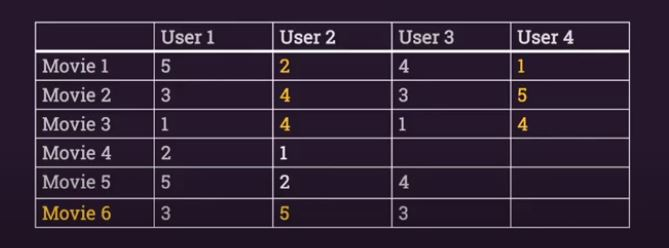
    
    User 2 and User 4 most similar rating, so find movie that was not watched by User 4 and was given a high rating by User 2.

In [29]:
# read movies and rating data using pandas 
rating = pd.read_csv('ratings.csv')
movie = pd.read_csv('movies.csv')
rating = pd.merge(movie, rating).drop(['genres','timestamp'], axis = 1)
rating.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [30]:
# create a pivot table where movie titles are columns, userId's are rows and ratings are the values
user_ratings = rating.pivot_table(index = ['userId'], columns = 'title', values= 'rating')
user_ratings.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Drop movies where less than 10 users have rated the movie and fill the remaining NaN values with 0.
user_ratings = user_ratings.dropna(thresh = 10, axis=1).fillna(0)

In [32]:
user_ratings.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Similarity matrix using Pearson method 
item_similarity_df = user_ratings.corr(method = 'pearson')


In [34]:
item_similarity_df.head(50)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518
101 Dalmatians (1996),0.087931,0.148903,0.006139,0.223481,0.234459,1.000000,0.285112,0.119843,0.072399,0.029967,...,0.114968,0.077232,0.096294,0.067134,0.113224,0.184324,0.054024,0.047804,0.156932,0.078734
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.224052,0.142141,-0.016835,0.211473,0.119132,0.285112,1.000000,0.134037,0.017264,-0.046277,...,0.120302,0.125816,0.049818,0.083650,0.171654,0.274260,0.077594,0.085606,0.248820,0.171118
12 Angry Men (1957),0.034223,0.159756,0.031704,0.011784,0.059187,0.119843,0.134037,1.000000,0.132979,0.058862,...,0.104518,0.028415,0.079905,0.241435,0.144652,0.122107,0.056742,-0.001708,0.074306,0.102744
12 Years a Slave (2013),0.009277,0.135486,-0.024275,0.091964,-0.025882,0.072399,0.017264,0.132979,1.000000,0.249931,...,0.024045,0.038127,0.013786,0.190366,0.104150,0.017351,0.063325,0.002528,0.037469,0.004213


In [35]:
# function to get similar movies based on ratings
def get_similar_movies(movie_name, user_rating):
    similar_score = item_similarity_df[movie_name]*(user_rating - 2.5)
    similar_score = similar_score.sort_values(ascending = False)
    return similar_score

In [36]:
action_lover = [('2 Fast 2 Furious (Fast and the Furious 2, The) (2003)', 5),
               ('12 Years a Slave (2013)', 4),
               ('2012 (2009)', 3),
               ('50 First Dates (2004)', 2)]

similar_movies = pd.DataFrame()

for movie, rating in action_lover:
    #print(movie, rating)
    similar_movies = similar_movies.append(get_similar_movies(movie, rating), ignore_index = True)
    

__Below is a list of Movies recommended for user action_lover based on his ratings.__

In [37]:
action_lover_recommended = similar_movies.sum().sort_values(ascending = False)
action_lover_recommended.head(50)

2 Fast 2 Furious (Fast and the Furious 2, The) (2003)                          2.565731
12 Years a Slave (2013)                                                        1.658995
Fast and the Furious, The (2001)                                               1.556228
Fast & Furious (Fast and the Furious 4, The) (2009)                            1.551123
Die Another Day (2002)                                                         1.454834
Mission: Impossible III (2006)                                                 1.439201
Crank (2006)                                                                   1.424031
xXx (2002)                                                                     1.415299
Jumper (2008)                                                                  1.411520
Wanted (2008)                                                                  1.408448
Smokin' Aces (2006)                                                            1.405033
Dallas Buyers Club (2013)       

In [38]:
movie_lover = [('Die Another Day (2002)', 5),
               ('Fast & Furious (Fast and the Furious 4, The) (2009)', 4),
               ('27 Dresses (2008)', 5),
               ('Lake House, The (2006)', 3),
               ('A.I. Artificial Intelligence (2001)', 2)]

similar_movies = pd.DataFrame()

for movie, rating in movie_lover:
    #print(movie, rating)
    similar_movies = similar_movies.append(get_similar_movies(movie, rating), ignore_index = True)
    

__Below is a list of Movies recommended for user movie_lover based on his ratings.__

In [39]:
movie_lover_recommended = similar_movies.sum().sort_values(ascending = False)
movie_lover_recommended.head(50)

Die Another Day (2002)                                    3.100956
27 Dresses (2008)                                         2.898251
Charlie's Angels: Full Throttle (2003)                    2.639937
2 Fast 2 Furious (Fast and the Furious 2, The) (2003)     2.269947
xXx (2002)                                                2.191080
Fantastic Four (2005)                                     2.172074
Fast & Furious (Fast and the Furious 4, The) (2009)       2.137577
Hitch (2005)                                              2.132613
What Women Want (2000)                                    2.116666
Jumper (2008)                                             2.048997
Holiday, The (2006)                                       2.033297
Wanted (2008)                                             2.005211
Dungeons & Dragons (2000)                                 1.973336
Mummy Returns, The (2001)                                 1.967259
S.W.A.T. (2003)                                           1.92